### It appears as thought the CEBPb expression for the first data set is not going as I would have thought. I would like to see if there are lipid droplets in the final time point in order to try to pin down what is going wrong here

In [1]:
import os
import numpy as np
import pandas as pd
from skimage import io
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.fftpack import dct
import shutil
%gui qt
import napari

C:\ProgramData\Anaconda3\lib\site-packages\napari\__init__.py:27: UserWarning: 
    napari was tested with QT library `>=5.12.3`.
    The version installed is 5.9.6. Please report any issues with this
    specific QT version at https://github.com/Napari/napari/issues.
    
  warn(message=warn_message)


### First thing will be to load in the dataset in order to get an idea of what is happening

In [2]:
'''load in data set'''

home_dir = r'C:\Users\LegantLab\Documents\git\tad\Legant_lab\200217_adipogen_zstacks\datases1_and2\dcts_output'
os.chdir(home_dir)


In [10]:
'''read in dataframes'''
df1 = pd.read_csv('df1_nb_parsed.csv')
df2 = pd.read_csv('df2_nb_parsed.csv')

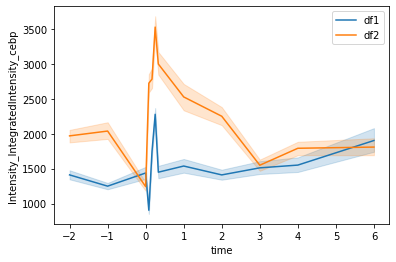

In [12]:
sns.lineplot(df1.time, df1.Intensity_IntegratedIntensity_cebp)
sns.lineplot(df2.time, df2.Intensity_IntegratedIntensity_cebp)
plt.legend(['df1', 'df2'])

### So there is clearly something funny that is happening here with df1. I am not entirely certian how to interpret this as these should be biological replicates of each other

### stad447 should be the last time point and it looks like I have some DIC images here so I will take a quick gander at these

In [9]:
len(df2)

1726

In [16]:
'''I need to move things into a seperate directory'''

'''this is not code that needs to be repeated so I commented it out'''

#working_dir = r'Z:\TAD\200217_adipogen_z_stacks\stad447_dic'
#os.chdir(working_dir)
#
#dir_names_ = []
#for i in os.listdir():
#    if i.endswith('.tif'):
#        dir_names_.append(i[:4])
#dir_names = list(np.unique(dir_names_))
#
#for i in dir_names:
#    os.mkdir(i)
#
#for i in dir_names:
#    destination_dir = working_dir + '\\' + i
#    tiff_files = []
#    for j in os.listdir():
#        if (j.endswith('.tif')):
#            tiff_files.append(j)
#    for j in tiff_files:
#        if (j[:4] in i):
#            shutil.move(working_dir + '\\' + j, destination_dir + '\\' + j) 

'this is not code that needs to be repeated so I commented it out'

In [3]:
'''this is most recent verion of this function as of 04-17-20. This updated version can change to different directories.
it also returns arrays that are the
appropriate data type'''
def make_z_stack(num_channels, bit_depth = 'uint16'):
    
    ###Get home directory to switch back to at the end
   # home_dir = os.getcwd()
    
    #change to directory that has set of .tiff files
   # if directory != os.getcwd():
    #    os.chdir(directory)
    
    #the data type that you would like the final images to be
  #  if bit_depth == 16:
  #      bit = 'uint16'
  #  if bit_depth == 8:
  #      bit = 'uint8'
  #  if bit_depth ==:
  #      bit = np.float32
    bit = bit_depth
        
        
    ## if stupid Thumbs.db is present in the file then this will remove it
    if 'Thumbs.db' in os.listdir():
        os.remove('Thumbs.db')
        
    
    ###generate list of sorted images
    image_lst = np.sort(os.listdir())
    ### figure out shape of empty zeros array for image
    img_ = io.imread(image_lst[0])
    n_row = img_.shape[0]
    n_col = img_.shape[1]
    n_plane = int(len(image_lst) / num_channels)
    #shape_tupple = np.zeros((n_z, n_row, n_col))
    
    ### generate some empyt arrays to be filled up
    c1_img = np.ndarray((n_plane, n_row, n_col), dtype = bit)
    c2_img = np.ndarray((n_plane, n_row, n_col), dtype = bit)
    c3_img = np.ndarray((n_plane, n_row, n_col), dtype = bit)
    c4_img = np.ndarray((n_plane, n_row, n_col), dtype = bit)
    c5_img = np.ndarray((n_plane, n_row, n_col), dtype = bit)
    
    ###read in and generate z-stack for each channel
    z_slice = 0
    for i in range(0 , (len(image_lst))- num_channels, num_channels):
        if num_channels == 1:
            c1_img[z_slice, :, :] = io.imread(image_lst[i])
        if num_channels == 2:
            c1_img[z_slice, :, :] = io.imread(image_lst[i])
            c2_img[z_slice, :, :] = io.imread(image_lst[i + 1])
        if num_channels == 3:
            c1_img[z_slice, :, :] = io.imread(image_lst[i])
            c2_img[z_slice, :, :] = io.imread(image_lst[i + 1])
            c3_img[z_slice, :, :] = io.imread(image_lst[i + 2])
        if num_channels == 4:
            c1_img[z_slice, :, :] = io.imread(image_lst[i])
            c2_img[z_slice, :, :] = io.imread(image_lst[i + 1])
            c3_img[z_slice, :, :] = io.imread(image_lst[i + 2])
            c4_img[z_slice, :, :] = io.imread(image_lst[i + 3])
        if num_channels == 5:
            c1_img[z_slice, :, :] = io.imread(image_lst[i])
            c2_img[z_slice, :, :] = io.imread(image_lst[i + 1])
            c3_img[z_slice, :, :] = io.imread(image_lst[i + 2])
            c4_img[z_slice, :, :] = io.imread(image_lst[i + 3])
            c5_img[z_slice, :, :] = io.imread(image_lst[i + 4])
        z_slice += 1
     
    ###change back to original directory
    os.chdir(home_dir)
    
    
    if num_channels == 1:
        c1_img = c1_img.astype(bit)
        return(c1_img)
    if num_channels == 2:
        c1_img = c1_img.astype(bit)
        c2_img = c2_img.astype(bit)
        return(c1_img, c2_img)
    if num_channels == 3:
        c1_img = c1_img.astype(bit)
        c2_img = c2_img.astype(bit)
        c3_img = c2_img.astype(bit)
        return(c1_img, c2_img, c3_img)
    if num_channels == 4:
        c1_img = c1_img.astype(bit)
        c2_img = c2_img.astype(bit)
        c3_img = c3_img.astype(bit)
        c4_img = c4_img.astype(bit)
        return(c1_img, c2_img, c3_img, c4_img)

    if num_channels  == 5:
        c1_img = c1_img.astype(bit)
        c2_img = c2_img.astype(bit)
        c3_img = c3_img.astype(bit)
        c4_img = c4_img.astype(bit)
        c5_img = c5_imglastype(bit)
        return(c1_img.astype(bit), c2_img.astype(bit), c3_img.astype(bit), c4_img.astype(bit), c5_img.astype(bit))

In [4]:
os.chdir(r'Z:\TAD\200217_adipogen_z_stacks\stad447_2_dic\xy03')

c1_dic, c2_dic = make_z_stack(2)

os.chdir(home_dir)


In [ ]:
'''I would like to see if these images match up to the four color fluorescent images that I too before'''


<Image layer 'c2' at 0x27a0d173c08>

In [5]:
'''red in maybe corresponding fluorescent images'''
os.chdir(r'Z:\TAD\200217_adipogen_z_stacks\stad447\xy03')
c1, c2, c3, c4 = make_z_stack(4, bit_depth=np. float32)
os.chdir(home_dir)

In [38]:
viewer = napari.Viewer()
viewer.add_image(c1_dic, name = 'c1_dic')
viewer.add_image(c2_dic, name = 'c2_dic')
viewer.add_image(c4_f, name = 'c4_f')

<Image layer 'c4_f' at 0x27a5f7c2748>

### Alrigt so it looks like these image sets line up correctly. They are not exactly register in xy but I think that they are close eought. 


### I would like to figure where the middle of each of the DIC images is as well and if this lines up reasonibly with the other images

In [6]:
'''This will calculate and return the shannon entropy of the normalized discrete cosine transform. This is 
taken from strategy used in doi: 10.1038/nbt.3708. takes in a 2D array and spits out a scaler, the dcst.
'''
def dcts(img_):
    dis_cos = dct(img_) #take the discrete cosine transform of the image
    l2 = np.sqrt(np.sum(np.square(img_))) #perform l2 normalization
    inner_term = np.divide(dis_cos, l2) #inner term of the shannon enropy
    '''need to get rid of any zeros that occur in inner term'''
    inner_term[inner_term == 0] = .0001
    first_term = np.abs(inner_term) #first term of shannon entropy
    second_term = np.log2(np.abs(inner_term)) #second term of shannon entropy 
    return(np.multiply(-1, np.sum(np.multiply(first_term, second_term))))
    #return(second_term)
                        

In [7]:
'''this iterates over each of the stacks and pulls out the dcts and the std of each slice and places them into
respective lists'''

#lists to be populated with the dcts of each channel
c1_dcts_lst = []
c2_dcts_lst = []
c3_dcts_lst = []
c4_dcts_lst = []

#lists to be populated with the std of each channel
c1_std_lst = []
c2_std_lst = []
c3_std_lst = []
c4_std_lst = []


for i in range(44):
    c1_slice  = c1[i, :, :]
    c2_slice = c2[i, :, :]
    c3_slice = c3[i, :, :]
    c4_slice = c4[i, :, :]
    
    c1_dcts_lst.append(dcts(c1_slice))
    c2_dcts_lst.append(dcts(c2_slice))
    c3_dcts_lst.append(dcts(c3_slice))
    c4_dcts_lst.append(dcts(c4_slice))
    
    c1_std_lst.append(np.std(c1_slice.flatten()))
    c2_std_lst.append(np.std(c2_slice.flatten()))
    c3_std_lst.append(np.std(c3_slice.flatten()))
    c4_std_lst.append(np.std(c4_slice.flatten()))

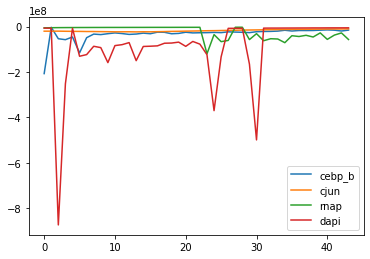

In [8]:
slice_lst = list(range(44))
ax = plt.plot(slice_lst, c1_dcts_lst)
ax = plt.plot(slice_lst, c2_dcts_lst)
ax = plt.plot(slice_lst, c3_dcts_lst)
ax = plt.plot(slice_lst, c4_dcts_lst)
plt.legend(['cebp_b', 'cjun', 'rnap', 'dapi'])

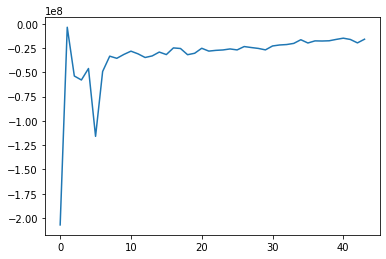

In [9]:
ax = plt.plot(slice_lst, c1_dcts_lst)

In [40]:
c4_f.shape

(45, 2048, 2044)

In [53]:
'''find the highese DCTS for each image'''

'''iterate over each slice of the cebp image and find the one with the highest dcts'''
#lists to be populated with the std of each channel
c1_dic_lst = []
c2_dic_lst = []
c1_f_lst = []
c4_f_lst = []


for i in range(44):
    c1_dic_slice  = c1_dic[i, :, :].astype('float32')
    c2_dic_slice = c2_dic[i, :, :].astype('float32')
    c1_f_slice = c1_f[i, :, :].astype('float32')
    c4_f_slice = c4_f[i, :, :].astype('float32')
    
    c1_dic_lst.append(dcts(c1_dic_slice))
    c2_dic_lst.append(dcts(c2_dic_slice))
    c1_f_lst.append(dcts(c1_f_slice))
    c4_f_lst.append(dcts(c4_f_slice))
    

In [56]:
c1_dic_slice.dtype

dtype('float32')

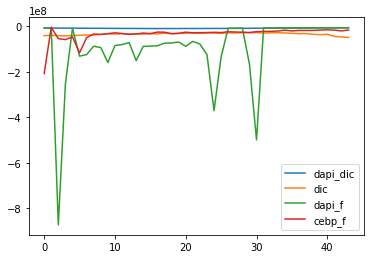

In [54]:
slice_n = list(range(0, c4_f.shape[0] -1))

plt.plot(slice_n, c1_dic_dcts)
plt.plot(slice_n, c2_dic_dcts)
plt.plot(slice_n, dapi_f_dcts)
plt.plot(slice_n, cebp_f_dcts)
plt.legend(['dapi_dic', 'dic', 'dapi_f', 'cebp_f'])

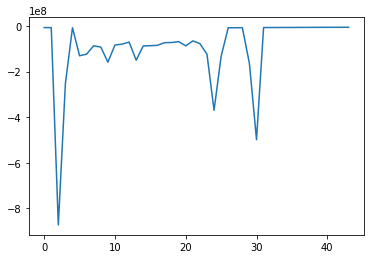

In [34]:
plt.plot(slice_n, dapi_f_dcts)

In [58]:
os.chdir(r'Z:\TAD\200217_adipogen_z_stacks\stad442\xy01')
c1, c2, c3, c4 = make_z_stack(4, bit_depth = np.float32)

In [63]:
'''this iterates over each of the stacks and pulls out the dcts and the std of each slice and places them into
respective lists'''
c1 = c1_dic.copy()
c2 = c2_dic.copy()
c3 = c1_f.copy()
c4 = c4_f.copy()


#lists to be populated with the dcts of each channel
c1_dcts_lst = []
c2_dcts_lst = []
c3_dcts_lst = []
c4_dcts_lst = []

#lists to be populated with the std of each channel
c1_std_lst = []
c2_std_lst = []
c3_std_lst = []
c4_std_lst = []


for i in range(44):
    c1_slice  = c1[i, :, :]
    c2_slice = c2[i, :, :]
    c3_slice = c3[i, :, :]
    c4_slice = c4[i, :, :]
    
    c1_dcts_lst.append(dcts(c1_slice))
    c2_dcts_lst.append(dcts(c2_slice))
    c3_dcts_lst.append(dcts(c3_slice))
    c4_dcts_lst.append(dcts(c4_slice))
    
    c1_std_lst.append(np.std(c1_slice.flatten()))
    c2_std_lst.append(np.std(c2_slice.flatten()))
    c3_std_lst.append(np.std(c3_slice.flatten()))
    c4_std_lst.append(np.std(c4_slice.flatten()))
    

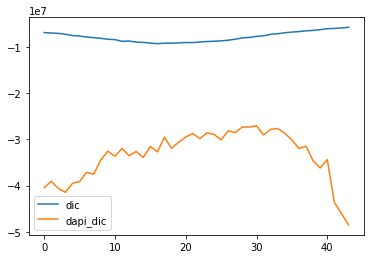

In [71]:
slice_lst = list(range(44))
ax = plt.plot(slice_lst, c1_dcts_lst)
ax = plt.plot(slice_lst, c2_dcts_lst)
#ax = plt.plot(slice_lst, c3_dcts_lst)
#ax = plt.plot(slice_lst, c4_dcts_lst)
plt.legend(['dic', 'dapi_dic', 'dapi_f', 'cebp_f'])

In [69]:
viewer = napari.Viewer()
viewer.add_image(c4)

<Image layer 'Image' at 0x27a67ac4808>

In [68]:
import napari